# Prepare rules for the all the data sets.

1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values.

2) Change the minimum length in apriori algorithm.

3) Visulize the obtained rules using different plots.

In [1]:
from google.colab import files
upload=files.upload()

Saving my_movies (1).csv to my_movies (1).csv


In [50]:
import pandas as pd
df=pd.read_csv("my_movies (1).csv")
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [51]:
df.corr()

<ipython-input-51-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
Sixth Sense,1.000000,0.356348,-0.102062,-0.102062,0.166667,-0.102062,-0.408248,0.272166,-0.408248,0.408248
Gladiator,0.356348,1.000000,-0.763763,-0.763763,0.801784,-0.763763,-0.509175,0.218218,0.218218,-0.218218
LOTR1,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter1,-0.102062,-0.763763,0.375000,1.000000,-0.612372,0.375000,0.666667,-0.166667,-0.166667,0.375000
Patriot,0.166667,0.801784,-0.612372,-0.612372,1.000000,-0.612372,-0.408248,-0.408248,0.272166,-0.612372
LOTR2,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter2,-0.408248,-0.509175,-0.166667,0.666667,-0.408248,-0.166667,1.000000,-0.111111,-0.111111,-0.166667
LOTR,0.272166,0.218218,-0.166667,-0.166667,-0.408248,-0.166667,-0.111111,1.000000,-0.111111,0.666667
Braveheart,-0.408248,0.218218,-0.166667,-0.166667,0.272166,-0.166667,-0.111111,-0.111111,1.000000,-0.166667
Green Mile,0.408248,-0.218218,0.375000,0.375000,-0.612372,0.375000,-0.166667,0.666667,-0.166667,1.000000


In [52]:
len(df)

10

In [53]:
trans = []
for i in range(0,10):
  trans.append([str(df.values[i,j]) for j in range(0, 15)])
trans

[['Sixth Sense',
  'LOTR1',
  'Harry Potter1',
  'Green Mile',
  'LOTR2',
  '1',
  '0',
  '1',
  '1',
  '0',
  '1',
  '0',
  '0',
  '0',
  '1'],
 ['Gladiator',
  'Patriot',
  'Braveheart',
  'nan',
  'nan',
  '0',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '1',
  '0'],
 ['LOTR1',
  'LOTR2',
  'nan',
  'nan',
  'nan',
  '0',
  '0',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0'],
 ['Gladiator',
  'Patriot',
  'Sixth Sense',
  'nan',
  'nan',
  '1',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['Gladiator',
  'Patriot',
  'Sixth Sense',
  'nan',
  'nan',
  '1',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['Gladiator',
  'Patriot',
  'Sixth Sense',
  'nan',
  'nan',
  '1',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['Harry Potter1',
  'Harry Potter2',
  'nan',
  'nan',
  'nan',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0'],
 ['Gladiator',
  'Patriot',
  'nan',
  'nan',
  'nan',
  '0',
  

In [55]:
!pip install apyori
from apyori import apriori
rules=apriori(transactions = trans,
               min_support=0.003,
               min_confidence=0.2,
               min_lift=3,
               min_length=2,
               max_lemgth=2)
rules

<generator object apriori at 0x7cff42c429d0>

In [56]:
report=list(rules)
report

[RelationRecord(items=frozenset({'LOTR', 'Green Mile'}), support=0.1, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Green Mile'}), items_add=frozenset({'LOTR'}), confidence=0.5, lift=5.0), OrderedStatistic(items_base=frozenset({'LOTR'}), items_add=frozenset({'Green Mile'}), confidence=1.0, lift=5.0)]),
 RelationRecord(items=frozenset({'Harry Potter2', 'Harry Potter1'}), support=0.1, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Harry Potter1'}), items_add=frozenset({'Harry Potter2'}), confidence=0.5, lift=5.0), OrderedStatistic(items_base=frozenset({'Harry Potter2'}), items_add=frozenset({'Harry Potter1'}), confidence=1.0, lift=5.0)]),
 RelationRecord(items=frozenset({'LOTR2', 'LOTR1'}), support=0.2, ordered_statistics=[OrderedStatistic(items_base=frozenset({'LOTR1'}), items_add=frozenset({'LOTR2'}), confidence=1.0, lift=5.0), OrderedStatistic(items_base=frozenset({'LOTR2'}), items_add=frozenset({'LOTR1'}), confidence=1.0, lift=5.0)]),
 RelationRecord(items=

In [57]:
len(report)

112

In [59]:
report[0]

RelationRecord(items=frozenset({'LOTR', 'Green Mile'}), support=0.1, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Green Mile'}), items_add=frozenset({'LOTR'}), confidence=0.5, lift=5.0), OrderedStatistic(items_base=frozenset({'LOTR'}), items_add=frozenset({'Green Mile'}), confidence=1.0, lift=5.0)])

In [60]:
report[0][1] #support

0.1

In [61]:
report[0][2][0][0]  #1st order Base item

frozenset({'Green Mile'})

In [79]:
report[0][2][0][1]  #1st order Add item

frozenset({'LOTR'})

In [63]:
report[0][2][0][2] #1st order Confidence item

0.5

In [64]:
report[0][2][0][3] #1st order Lift item

5.0

In [65]:
report[0][2][1][0] #2nd order Base item

frozenset({'LOTR'})

In [66]:
report[0][2][1][1] #2nd order Add item

frozenset({'Green Mile'})

In [67]:
report[0][2][1][2] #2nd order Confidence item

1.0

In [68]:
report[0][2][1][3] #2nd order Lift item

5.0

In [69]:
# Access through for loop
a=[]
b=[]
c=[]
d=[]
e=[]
f=[]
g=[]
h=[]
k=[]

for i in range(0,112):
    a.append(report[i][1]) # support
    b.append(report[i][2][0][0]) #1st order Base item
    c.append(report[i][2][0][1]) #1st order Add item
    d.append(report[i][2][0][2]) #1st order Confidence item
    e.append(report[i][2][0][3]) #1st order Lift item
    f.append(report[i][2][1][0]) #2st order Base item
    g.append(report[i][2][1][1]) #2st order Add item
    h.append(report[i][2][1][2]) #2st order Confidence item
    k.append(report[i][2][1][3]) #2st order Lift item

In [84]:
df["Support"]  = pd.DataFrame(a)
df["1st_Base_item"]  = pd.DataFrame(b)
df["1st_add_item"] = pd.Series(c)
df["1st_Confidence"]  = pd.DataFrame(d)
df["1st_Lift"]  = pd.DataFrame(e)
df["2st_order_Base_item"]  = pd.Series(f)
df["2st_order_Add_item"]  = pd.Series(g)
df["2st_order_Confidence"]  = pd.DataFrame(h)
df["2st_order_Lift"]  = pd.DataFrame(k)
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,...,1st_order_Confidence,1st_order_Lift,1st_Base_item,1st_add_item,1st_Confidence,1st_Lift,2st_order_Base_item,2st_order_Add_item,2st_order_Confidence,2st_order_Lift
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,...,0.5,5.0,Green Mile,(LOTR),0.5,5.0,(LOTR),(Green Mile),1.0,5.0
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,...,0.5,5.0,Harry Potter1,(Harry Potter2),0.5,5.0,(Harry Potter2),(Harry Potter1),1.0,5.0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,...,1.0,5.0,LOTR1,(LOTR2),1.0,5.0,(LOTR2),(LOTR1),1.0,5.0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,...,0.5,5.0,Green Mile,"(0, LOTR)",0.5,5.0,(LOTR),"(0, Green Mile)",1.0,5.0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,...,0.5,5.0,Harry Potter1,"(Harry Potter2, 0)",0.5,5.0,(Harry Potter2),"(0, Harry Potter1)",1.0,5.0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,...,1.0,5.0,LOTR1,"(0, LOTR2)",1.0,5.0,(LOTR2),"(0, LOTR1)",1.0,5.0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,...,0.5,5.0,Green Mile,"(1, LOTR)",0.5,5.0,(LOTR),"(1, Green Mile)",1.0,5.0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,...,0.5,5.0,Harry Potter1,"(Harry Potter2, 1)",0.5,5.0,(Harry Potter2),"(1, Harry Potter1)",1.0,5.0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,...,1.0,5.0,LOTR1,"(1, LOTR2)",1.0,5.0,(LOTR2),"(1, LOTR1)",1.0,5.0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,...,0.5,5.0,Green Mile,"(LOTR, Gladiator)",0.5,5.0,(LOTR),"(Green Mile, Gladiator)",1.0,10.0


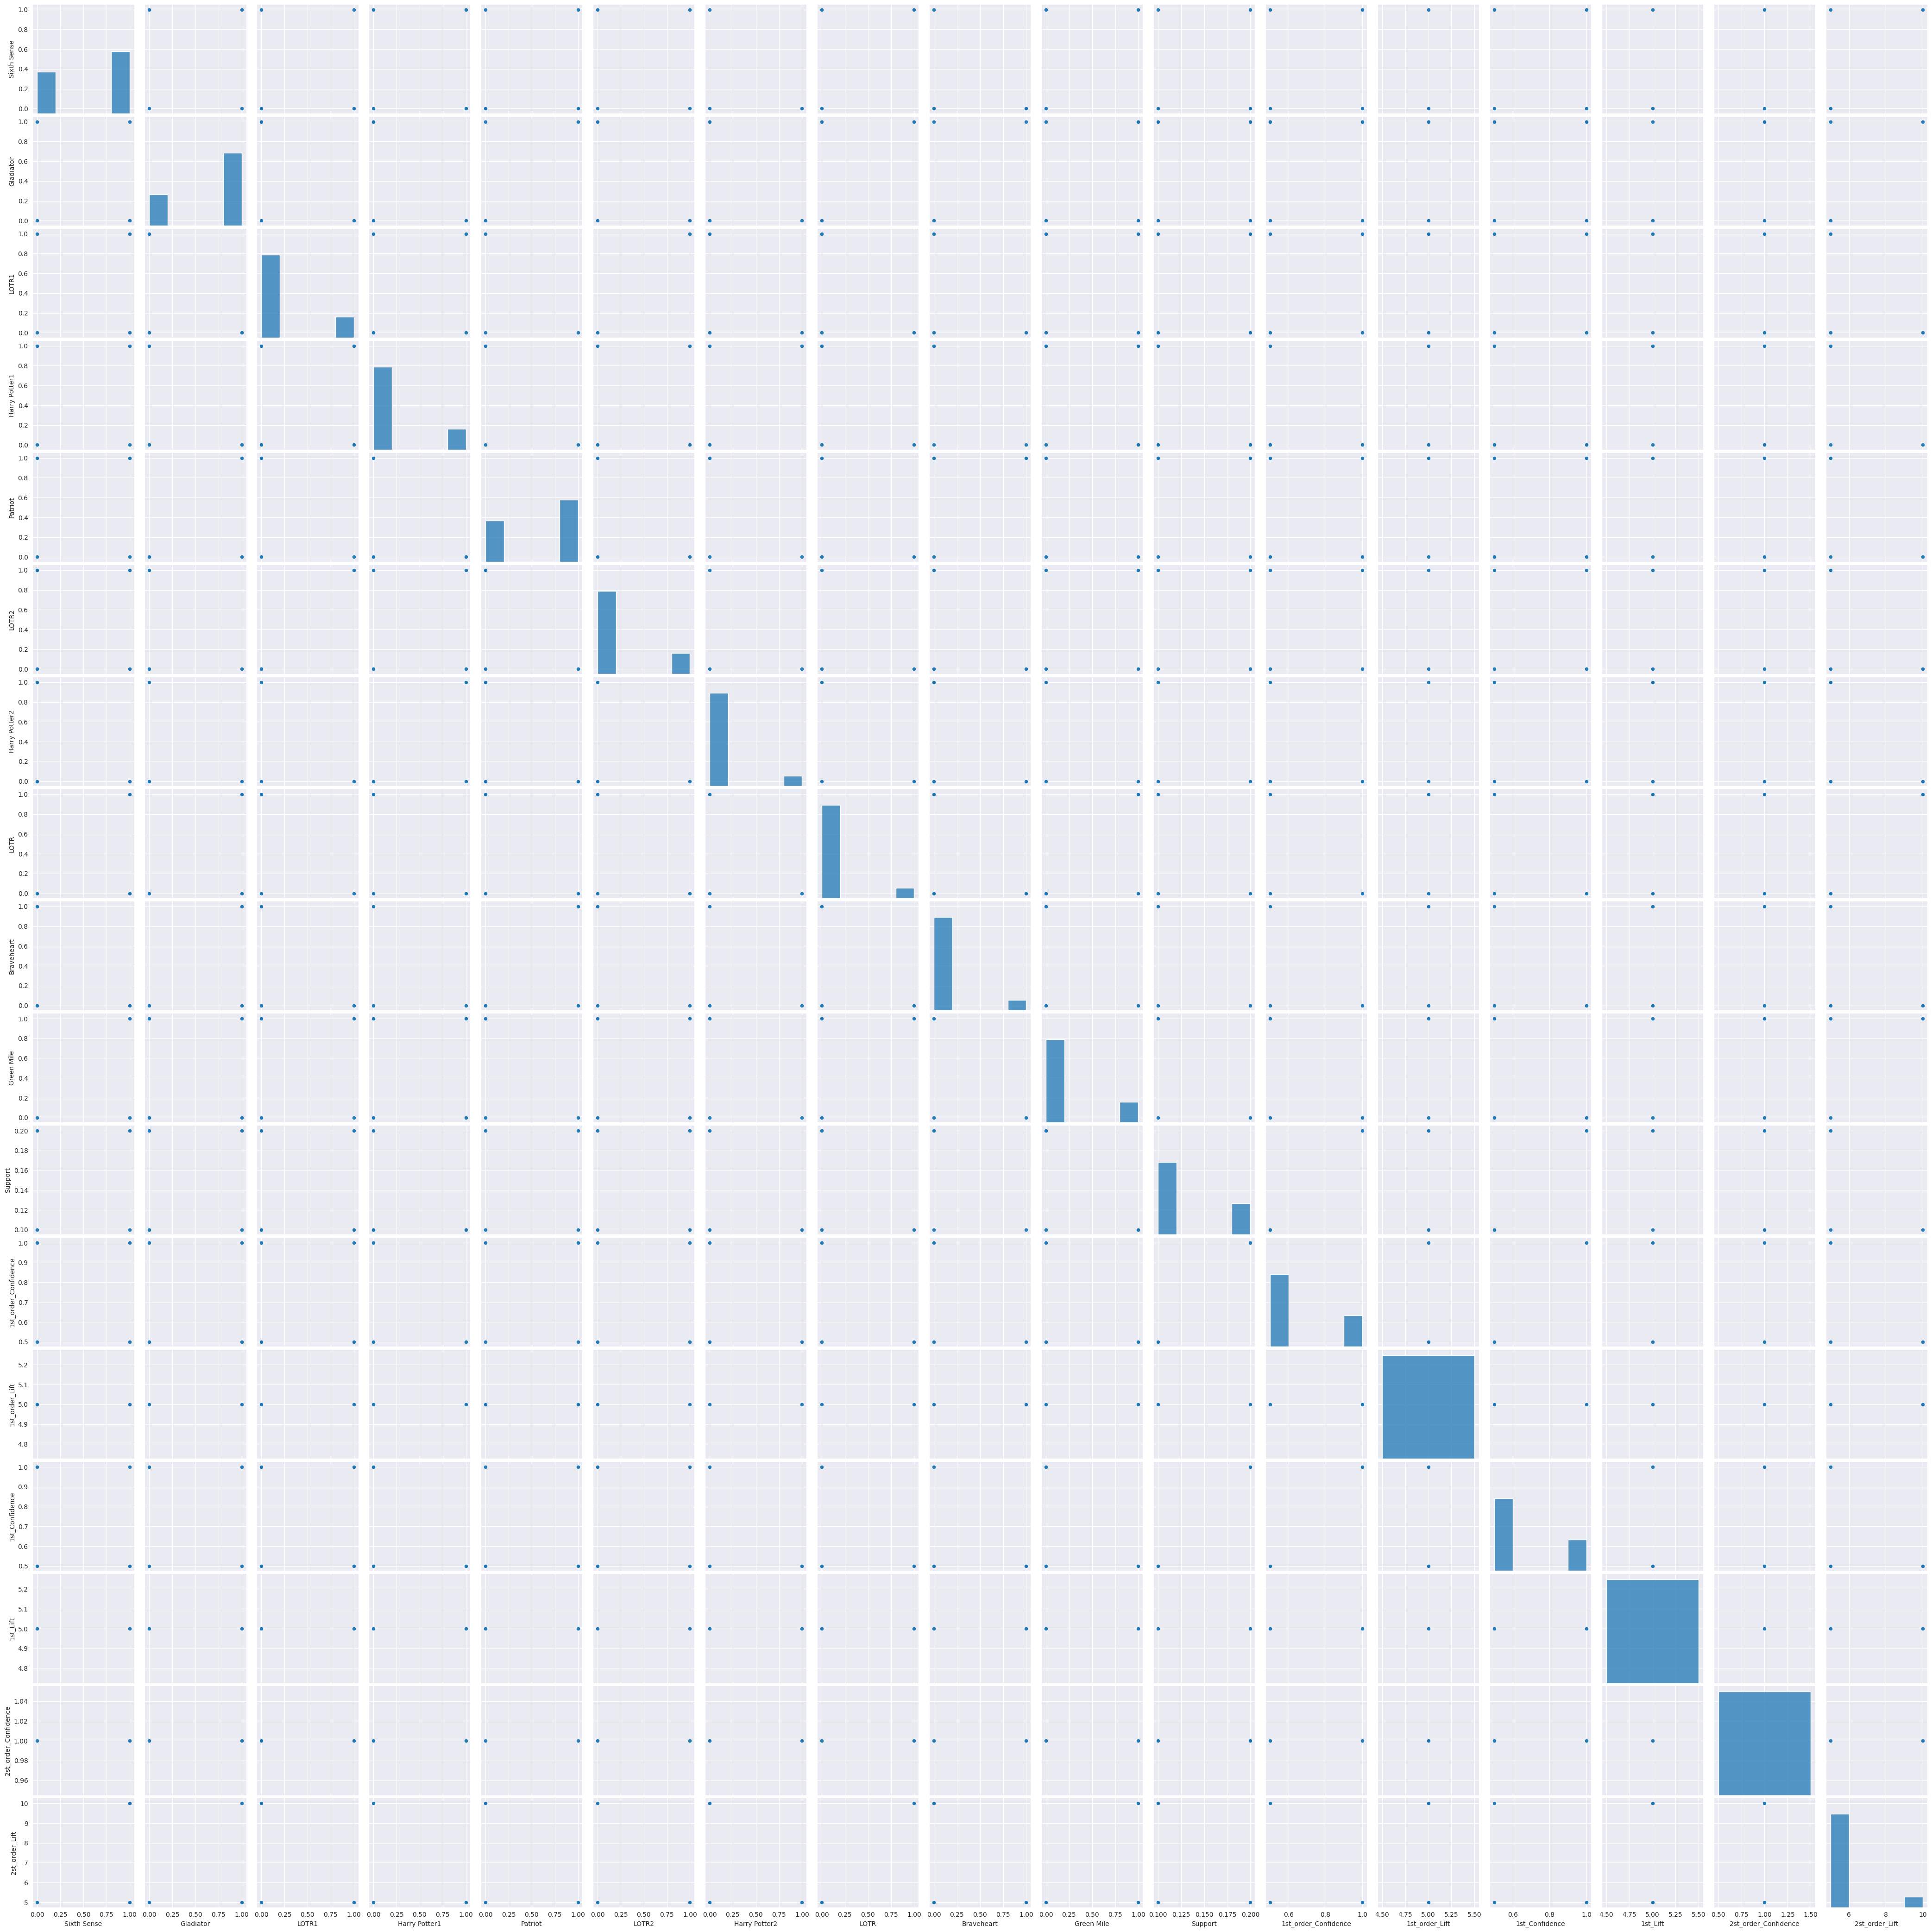

In [85]:
import seaborn as sns
sns.set_style(style="darkgrid")
sns.pairplot(df)